<a href="https://colab.research.google.com/github/ShubhamP1028/DeepLearning/blob/main/Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normalisation
---
We’ll normalize the features so that each input variable is on a similar scale, which helps with convergence during training. I’ll use MinMaxScaler for simplicity (you could also use StandardScaler).

---
<b>What is Normalisation? ➡</b>

Imagine you’re training a group of athletes 🏃‍♀️🏃‍♂️ for a relay race.
*  One is measured in meters per second,
*  Another in minutes per kilometer,
*  Another in miles per hour.

If you don’t convert them into the same scale, comparing their performance is confusing.

👉 Normalization = putting all features on a common scale so the model can learn fairly.

---
<b>🛠 Why It Matters</b>
*  Faster training – Gradient descent works better when features have similar ranges.
*  Avoid bias – A large-scale feature (like salary in ₹100,000s) shouldn’t dominate a small-scale feature (like age in 20s).
*  Better accuracy – Helps the model find general patterns instead of latching onto magnitudes.

Types of Normalization (most common)-

<b>1. Min-Max Normalization (Scaling)</b>
*  Rescales values into a fixed range, usually [0,1].
$$x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}$$

*  Example:
  *  Age 0–100 → 0–1
  *  Salary 20k–120k → 0–1

⚡ Best when you know the min/max and data has no extreme outliers.

---
<b>2. Z-score Normalization (Standardization)</b>
*  Centers data around 0 with standard deviation 1.
$$x' = \frac{x - \mu}{\sigma}$$
*  Example: If height mean = 170cm, std = 10cm → a person of 180cm =
(180−170)/10=1.0.

Meaning: “1 standard deviation above average.”

⚡ Best for ML/DL models (especially neural nets) since it keeps data balanced around zero.


---
3. Unit Vector Normalization
*  Scale each row (sample) to length 1.
$$x' = \frac{x}{\|x\|}$$
*  Useful in text embeddings, where direction matters more than magnitude.

---
## <u>Deep Learning Normalisation Techniques</u>
Normalization happens before training (input features) and sometimes inside the network:
*  Batch Normalization: Normalizes layer outputs during training to keep activations stable.
*  Layer Normalization / Group Normalization: Variants for different architectures (like transformers).

---
*  Min-Max, Z-score, Unit Vector = input normalization (before training).
*  Batch Norm, Layer Norm = activation normalization (during training) to keep the network stable and fast.
---

### ⚡<u><b>Batch Normalization (BN)</b></u> - normalize across the team (batch)
Intuition

Normalizes activations across the batch dimension.

Think: "Look at all samples in the batch, compute mean & std, then normalize each feature channel."

Very similar to Z-score normalization — but applied per mini-batch during training.

Formula-

For activation
𝑥 in a batch:
$$\hat{x} = \frac{x - \mu_{\text{batch}}}{\sqrt{\sigma^2_{\text{batch}} + \epsilon}}$$

Then apply learnable scale and shift:
$$y = \gamma \hat{x} + \beta$$

*  𝜇 batch: mean of the batch
*  𝜎 batch2: variance of the batch
*  𝜖: small constant for stability
*  𝛾,𝛽: trainable parameters (so model can “undo” normalization if useful)

<u><b>Analogy to earlier normalizations</b></u>

Like Z-score normalization, but mean/std are computed per batch, not globally.

Keeps features stable across training steps.

---
### ⚡<u><b> Layer Normalization (LN)</b></u> - normalize within each player (sample)
Intuition

*  Normalizes across the features of a single sample (row), not across the batch.
*  Useful when batch size is small or variable (e.g., in NLP/Transformers).
*  Think: "For each training example, make all of its features balanced."

Formula - For activation vector

𝑥 of one sample:
$$\hat{x}_i = \frac{x_i - \mu}{\sqrt{\sigma^2 + \epsilon}}$$

Then scale & shift:

$$y_i = \gamma \hat{x}_i + \beta$$

*  Here, 𝜇 and 𝜎^2 are computed over all features of the sample.
*  Analogy to earlier normalizations
*  Feels like unit vector normalization, because you normalize per-sample.

But instead of dividing by total vector length (∥x∥), it uses mean and variance across features.

---
<table>
<tr>🔑 Key Differences Between BN and LN</tr>
<tr><th>Aspect</th><th>	Batch Norm (BN)</th><th>	Layer Norm (LN)</th></tr>
<tr><td>Normalizes over</td>	<td>Batch dimension (across samples)</td>	<td>Feature dimension (within each sample)</td></tr>
<tr><td>Similar to	</td>	<td>Z-score normalization (per batch)</td>	<td>	Unit vector idea (per row/sample)</td></tr>
<tr><td>Works best in</td>	<td>	CNNs, large batches	RNNs,</td>	<td> Transformers, small batches</td></tr>
<tr><td>Sensitive to batch size</td>	<td>	✅ Yes</td>	<td>	❌ No</td></tr>
</table>

---

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5798 - loss: 0.6873 - val_accuracy: 0.6581 - val_loss: 0.6671
Epoch 2/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7392 - loss: 0.6391 - val_accuracy: 0.7932 - val_loss: 0.5908
Epoch 3/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7684 - loss: 0.5582 - val_accuracy: 0.7018 - val_loss: 0.5522
Epoch 4/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7866 - loss: 0.4796 - val_accuracy: 0.8290 - val_loss: 0.4556
Epoch 5/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8073 - loss: 0.4431 - val_accuracy: 0.7972 - val_loss: 0.4318
Epoch 6/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8097 - loss: 0.4187 - val_accuracy: 0.8529 - val_loss: 0.3907
Epoch 7/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8408 - loss: 0.3952 - val_accuracy: 0.8390 - val_loss: 0.3795
Epoch 8/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8315 - loss: 0.3811 - val_accuracy: 0.

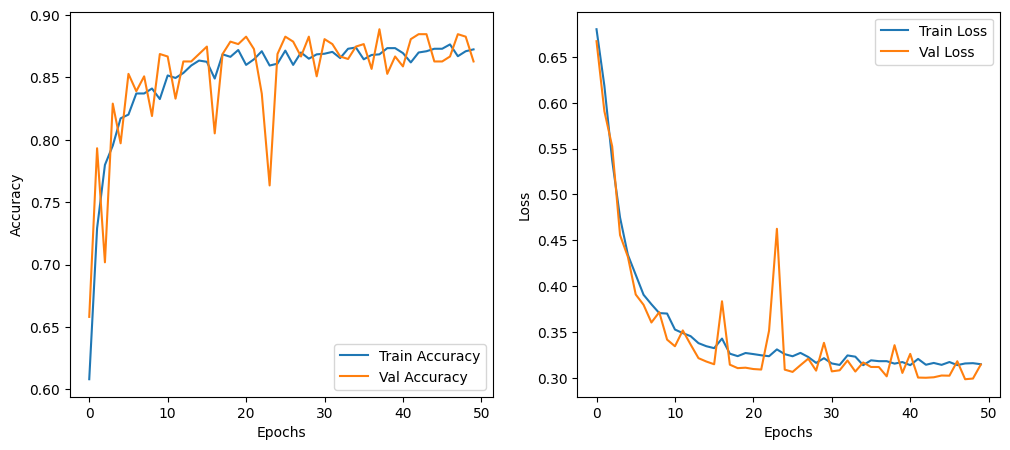

Validation Accuracy: 0.8628


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("goldstock.csv")

# 2. Feature engineering
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['is_quarter_end'] = np.where(df['Date'].str.endswith(('03-31','06-30','09-30','12-31')), 1, 0)

# Target: Price goes up next day (binary classification)
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df.dropna(inplace=True)

# 3. Features and target
X = df[['open-close', 'low-high', 'is_quarter_end']].values
y = df['target'].values

# 4. Normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, shuffle=False
)

# 6. TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 7. Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=16,
                    verbose=1)

# 8. Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 9. Evaluation
loss, acc = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {acc:.4f}")


---
### 1. Accuracy Plot (Left)

*  Blue line (Train Accuracy): Starts at ~0.60 and steadily increases to ~0.87 by epoch 15–20, then stabilizes.
*  Orange line (Validation Accuracy): Follows a similar trend and overlaps closely with training accuracy. It fluctuates a bit (because the dataset is small), but still hovers around ~0.86–0.89 in the final epochs.

Interpretation:
*  The model is learning well — both training and validation accuracy improve together.
*  No obvious overfitting — validation accuracy stays close to training accuracy.
*  The small jumps in validation accuracy are normal for a smaller dataset.

### 2. Loss Plot (Right)
*  Blue line (Train Loss): Starts at ~0.67 and drops quickly to ~0.31.
*  Orange line (Validation Loss): Mirrors training loss and ends close to ~0.30.

There are small spikes in validation loss — again, typical for smaller datasets and batch-based updates.

Interpretation:

*  Loss is decreasing for both training and validation, which means the model is optimizing properly.
*  The loss values flatten out after ~20 epochs — suggesting the model has mostly converged.

### 3. Final Outcome
*  Validation Accuracy ≈ 0.87 means your model correctly predicts ~87% of cases on unseen data.
*  The model generalizes well, and your preprocessing + normalization step helped it converge faster.

No major signs of overfitting — training and validation curves are well-aligned.

---

Epoch 1/50 - Loss: 0.6830, Acc: 0.6021, Val Loss: 0.6751, Val Acc: 0.7078
Epoch 2/50 - Loss: 0.6373, Acc: 0.7356, Val Loss: 0.6032, Val Acc: 0.8131
Epoch 3/50 - Loss: 0.5317, Acc: 0.8137, Val Loss: 0.4896, Val Acc: 0.8469
Epoch 4/50 - Loss: 0.4385, Acc: 0.8317, Val Loss: 0.4194, Val Acc: 0.8688
Epoch 5/50 - Loss: 0.3925, Acc: 0.8466, Val Loss: 0.3796, Val Acc: 0.8748
Epoch 6/50 - Loss: 0.3665, Acc: 0.8531, Val Loss: 0.3568, Val Acc: 0.8767
Epoch 7/50 - Loss: 0.3520, Acc: 0.8576, Val Loss: 0.3426, Val Acc: 0.8787
Epoch 8/50 - Loss: 0.3428, Acc: 0.8621, Val Loss: 0.3333, Val Acc: 0.8728
Epoch 9/50 - Loss: 0.3370, Acc: 0.8625, Val Loss: 0.3270, Val Acc: 0.8668
Epoch 10/50 - Loss: 0.3329, Acc: 0.8640, Val Loss: 0.3228, Val Acc: 0.8668
Epoch 11/50 - Loss: 0.3299, Acc: 0.8650, Val Loss: 0.3198, Val Acc: 0.8628
Epoch 12/50 - Loss: 0.3278, Acc: 0.8645, Val Loss: 0.3170, Val Acc: 0.8628
Epoch 13/50 - Loss: 0.3260, Acc: 0.8665, Val Loss: 0.3153, Val Acc: 0.8628
Epoch 14/50 - Loss: 0.3248, Acc: 0

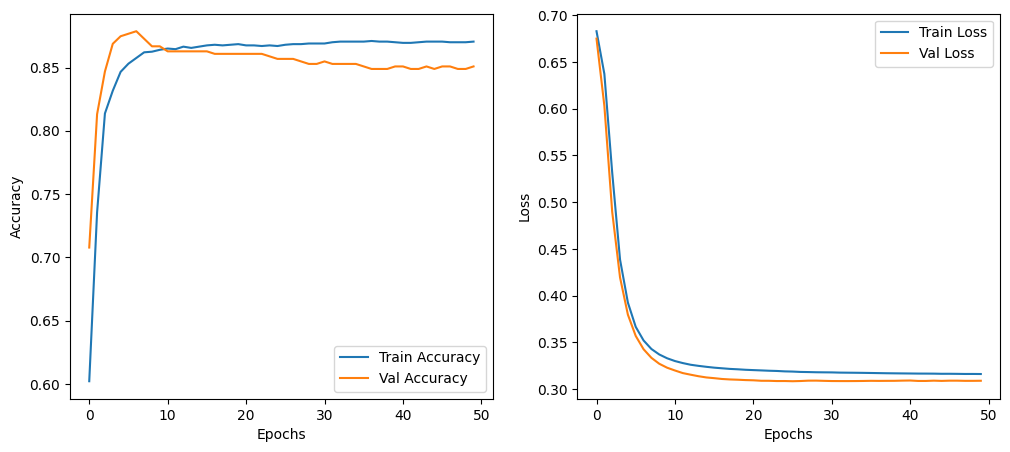

Validation Accuracy: 0.8509


In [5]:
# Pytoch Implementation
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

# Set random seed for reproducibility
torch.manual_seed(42)

# 1. Load dataset
df = pd.read_csv("goldstock.csv")

# 2. Feature engineering (identical)
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['is_quarter_end'] = np.where(df['Date'].str.endswith(('03-31','06-30','09-30','12-31')), 1, 0)

# Target: Price goes up next day (binary classification)
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df.dropna(inplace=True)

# 3. Features and target (identical)
X = df[['open-close', 'low-high', 'is_quarter_end']].values
y = df['target'].values

# 4. Normalization (identical)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-test split (identical)
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, shuffle=False
)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.FloatTensor(y_val).unsqueeze(1)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=False)

# 6. PyTorch model (equivalent to TensorFlow version)
class StockPredictor(nn.Module):
    def __init__(self, input_size):
        super(StockPredictor, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

model = StockPredictor(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 7. Train the model
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(50):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        predicted = (outputs > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    # Calculate training accuracy
    train_acc = correct / total
    train_loss = epoch_loss / len(train_loader)
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor).item()
        val_predicted = (val_outputs > 0.5).float()
        val_correct = (val_predicted == y_val_tensor).sum().item()
        val_acc = val_correct / len(y_val_tensor)

        val_losses.append(val_loss)
        val_accs.append(val_acc)

    print(f'Epoch {epoch+1}/50 - Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

# 8. Plot accuracy and loss (identical style)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_accs, label='Train Accuracy')
plt.plot(val_accs, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 9. Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_val_tensor)
    predicted = (outputs > 0.5).float()
    correct = (predicted == y_val_tensor).sum().item()
    val_acc = correct / len(y_val_tensor)

print(f"Validation Accuracy: {val_acc:.4f}")
